### Exercise 3

Suppose we have a lake with an infinite number of red and green fish. Red fish are disgusting and green fish are tasty. 

Run the following simulation a large number of times (e.g. $T = 10,000$ runs): 
There are $1,000$ fishermen each of whom has an unknown probability $\mu=0.5$ of catching red fish. Each fisherman independently catches $10$ fish. We focus on the following fishing strategy:

1. $f_1$ is the first fisherman
2. $f_r$ is a random fisherman
3. $f_*$ is the fisher with the lowest frequency of red fish among all fishers.


**(a)**
Record the $T$ fractions $\mu_n^1, \mu_n^r$, and $\mu_n^*$ of red fish for the respective three fishermen. Plot the histograms of the distributions of $\mu_n^1, \mu_n^r$, and $\mu_n^*$.

**(b)**
Using (a), plot estimates for $\mathbb{P}(|\mu_n-\mu|\geq \varepsilon)$ as a function of $\varepsilon>0$ together with the Hoeffding bound. 

**(c)** 
Which fishermen obey the Hoeffding bound, and which ones do not? Explain why. Relate the results to learning. 

##### Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_runs   = 10000    # trials
n_fisher = 1000     # fishermen 
n_sample = 10       # fishes 
mu       = 0.5      # probability of catching red fish

In [ ]:
def sample(n_fisher, n_sample, mu):
    '''Return result of each fisherman as matrix X. The i-th row of matrix X consists of the fishes caught by the i-th fisherman. 

    Parameters:
        n_fisher    number of fishermen
        n_sample    number of fishes caught by each fisherman
        mu          probability of catching red fish

    Return
        X           matrix of caught fishes 
    '''
    X = np.random.choice([0, 1], size=(n_fisher, n_sample), p=[1-mu, mu])
    return X

def run(n_runs, n_fisher, n_sample, mu):
    '''Return estimated mean of catching a read fish for each of the three fishermen f_1, f_r, f_* over all n_runs trials.

    Parameters:
        n_runs      number of trials
        n_fisher    number of fishermen
        n_sample    number of fishes caught by each fisherman
        mu          probability of catching red fish

    Return
        mu_n        sample means of the three fishermen over all trials.
    '''
    mu_n = np.zeros((3, n_runs))
    for t in range(n_runs):
        X = sample(n_fisher, n_sample, mu)
        X = X.mean(axis=1)
        mu_n[0,t] = X[0]
        mu_n[1,t] = X[np.random.randint(0, n_fisher)]
        mu_n[2,t] = X.min()
    return mu_n

In [4]:
mu_n = run(n_runs, n_fisher, n_sample, mu)
print(mu_n.mean(axis=1))

[0.50041 0.5004  0.03736]


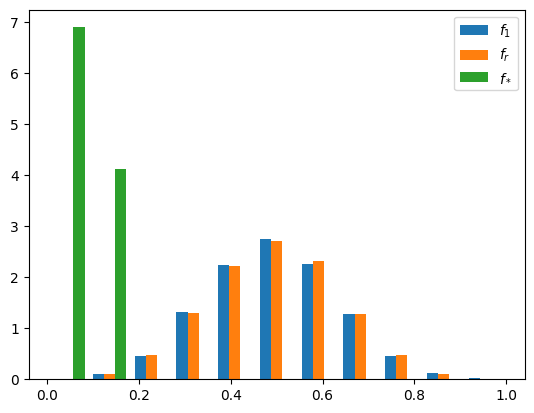

In [5]:
labels = ['$f_1$', '$f_r$', '$f_*$']
plt.hist(mu_n.T, bins=11, density=True, label=labels)
plt.legend()
plt.show()

In [6]:
eps = np.arange(0.01, 0.9, 0.02)
hoeffding = 2*np.exp(-2*n_sample*eps**2)

P = np.zeros((3, len(eps)))
for j, e in enumerate(eps):
    for i in range(3):
        d = np.abs(mu_n[i,:] - mu)
        P[i,j] = np.mean(d > e)

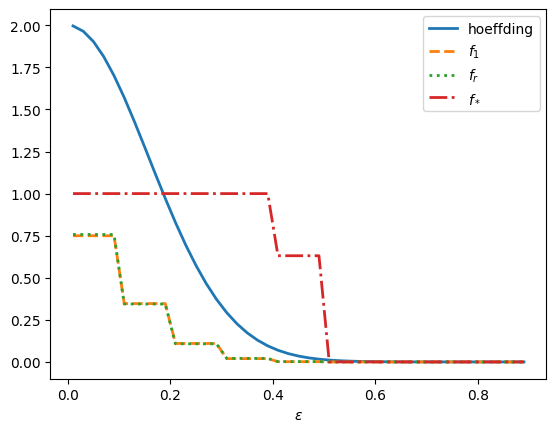

In [7]:
plt.plot(eps, hoeffding, lw=2, label='hoeffding')
plt.plot(eps, P[0], '--', lw=2, label='$f_1$')
plt.plot(eps, P[1], ':', lw=2, label='$f_r$')
plt.plot(eps, P[2], '-.', lw=2, label='$f_*$')
plt.xlabel(r'$\varepsilon$')
plt.legend()
plt.show()

The fishermen $f_1$ and $f_r$ obey the Hoeffding bound, while the fisherman $f_*$ violates it. We have the following analogy:

+ The *fishermen* are the possible functions form a hypothesis space
+ The *fish* are the data points.
+ *Catching fish* corresponds to making predictions on data points
+ *Red fish* represent misclassifications
+ The *fishing strategy* that selects $f_*$ corresponds to the best model returned by the ERM learner